In [7]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
import time
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


In [13]:
num_train = 49000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

In [18]:
best_model = None
best_acc = 0

learning_rate = 1e-3
weight_scale = 1e-2
reg = 1e-2

solvers = {}

for update_rule in ['adagrad', 'nesterov_momentum', 'adamopt', 'sgd', 'sgd_momentum', 'rmsprop', 'adam']:
    print('running with ', update_rule)
    model = FullyConnectedNet([256, 512, 256, 64], weight_scale=weight_scale, reg = reg)

    solver = Solver(model, small_data,
                  num_epochs=5, batch_size=256,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rate,
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print('learning_rate = %f, reg = %f, best val loss = %f' %(learning_rate, reg, solver.best_val_acc))
    if solver.best_val_acc > best_acc:
        best_acc = solver.best_val_acc
        best_model = model

running with  adagrad
(Iteration 1 / 955) loss: 6.910230
(Epoch 0 / 5) train acc: 0.140000; val_acc: 0.144000
(Iteration 11 / 955) loss: 6.079247
(Iteration 21 / 955) loss: 5.932885
(Iteration 31 / 955) loss: 5.832938
(Iteration 41 / 955) loss: 5.759636
(Iteration 51 / 955) loss: 5.703284
(Iteration 61 / 955) loss: 5.748733
(Iteration 71 / 955) loss: 5.582870
(Iteration 81 / 955) loss: 5.546097
(Iteration 91 / 955) loss: 5.692244
(Iteration 101 / 955) loss: 5.503245
(Iteration 111 / 955) loss: 5.524857
(Iteration 121 / 955) loss: 5.459900
(Iteration 131 / 955) loss: 5.513450
(Iteration 141 / 955) loss: 5.471226
(Iteration 151 / 955) loss: 5.490583
(Iteration 161 / 955) loss: 5.446398
(Iteration 171 / 955) loss: 5.402486
(Iteration 181 / 955) loss: 5.253462
(Iteration 191 / 955) loss: 5.383403
(Epoch 1 / 5) train acc: 0.457000; val_acc: 0.436000
(Iteration 201 / 955) loss: 5.361996
(Iteration 211 / 955) loss: 5.273110
(Iteration 221 / 955) loss: 5.248834
(Iteration 231 / 955) loss: 5.39

(Iteration 61 / 955) loss: 5.356252
(Iteration 71 / 955) loss: 5.185577
(Iteration 81 / 955) loss: 5.063850
(Iteration 91 / 955) loss: 5.001257
(Iteration 101 / 955) loss: 4.802281
(Iteration 111 / 955) loss: 4.686999
(Iteration 121 / 955) loss: 4.711682
(Iteration 131 / 955) loss: 4.637927
(Iteration 141 / 955) loss: 4.634381
(Iteration 151 / 955) loss: 4.506373
(Iteration 161 / 955) loss: 4.590001
(Iteration 171 / 955) loss: 4.370324
(Iteration 181 / 955) loss: 4.352854
(Iteration 191 / 955) loss: 4.376408
(Epoch 1 / 5) train acc: 0.415000; val_acc: 0.383000
(Iteration 201 / 955) loss: 4.362396
(Iteration 211 / 955) loss: 4.255103
(Iteration 221 / 955) loss: 4.158500
(Iteration 231 / 955) loss: 4.259999
(Iteration 241 / 955) loss: 4.136916
(Iteration 251 / 955) loss: 3.991561
(Iteration 261 / 955) loss: 4.049290
(Iteration 271 / 955) loss: 4.034701
(Iteration 281 / 955) loss: 3.901873
(Iteration 291 / 955) loss: 3.967205
(Iteration 301 / 955) loss: 3.991557
(Iteration 311 / 955) loss

(Iteration 151 / 955) loss: 5.067541
(Iteration 161 / 955) loss: 4.989205
(Iteration 171 / 955) loss: 4.971508
(Iteration 181 / 955) loss: 4.820842
(Iteration 191 / 955) loss: 4.874108
(Epoch 1 / 5) train acc: 0.456000; val_acc: 0.440000
(Iteration 201 / 955) loss: 4.942685
(Iteration 211 / 955) loss: 4.940541
(Iteration 221 / 955) loss: 4.908320
(Iteration 231 / 955) loss: 4.801148
(Iteration 241 / 955) loss: 4.822809
(Iteration 251 / 955) loss: 4.870364
(Iteration 261 / 955) loss: 4.836187
(Iteration 271 / 955) loss: 4.758540
(Iteration 281 / 955) loss: 4.741868
(Iteration 291 / 955) loss: 4.767169
(Iteration 301 / 955) loss: 4.755557
(Iteration 311 / 955) loss: 4.693013
(Iteration 321 / 955) loss: 4.717200
(Iteration 331 / 955) loss: 4.667259
(Iteration 341 / 955) loss: 4.732139
(Iteration 351 / 955) loss: 4.701058
(Iteration 361 / 955) loss: 4.678935
(Iteration 371 / 955) loss: 4.652106
(Iteration 381 / 955) loss: 4.605447
(Epoch 2 / 5) train acc: 0.545000; val_acc: 0.470000
(Itera

E:\OctaveProject\cs231n\assignment2\cs231n\layers.py:681: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


(Iteration 11 / 955) loss: 6.770121
(Iteration 21 / 955) loss: 6.494034
(Iteration 31 / 955) loss: 6.393260
(Iteration 41 / 955) loss: 6.232484
(Iteration 51 / 955) loss: 6.170308
(Iteration 61 / 955) loss: 6.110273
(Iteration 71 / 955) loss: 6.085207
(Iteration 81 / 955) loss: 6.235196
(Iteration 91 / 955) loss: 5.917497
(Iteration 101 / 955) loss: 6.028400
(Iteration 111 / 955) loss: 7.365824
(Iteration 121 / 955) loss: 5.911559
(Iteration 131 / 955) loss: 5.831626
(Iteration 141 / 955) loss: 5.741231
(Iteration 151 / 955) loss: 5.717099
(Iteration 161 / 955) loss: 5.626780
(Iteration 171 / 955) loss: 5.868673
(Iteration 181 / 955) loss: 5.827965
(Iteration 191 / 955) loss: 5.569107
(Epoch 1 / 5) train acc: 0.271000; val_acc: 0.285000
(Iteration 201 / 955) loss: 5.495586
(Iteration 211 / 955) loss: 5.501644
(Iteration 221 / 955) loss: 5.447446
(Iteration 231 / 955) loss: 6.448552
(Iteration 241 / 955) loss: 5.291939
(Iteration 251 / 955) loss: 5.429662
(Iteration 261 / 955) loss: 5.2

E:\Anaconda3\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


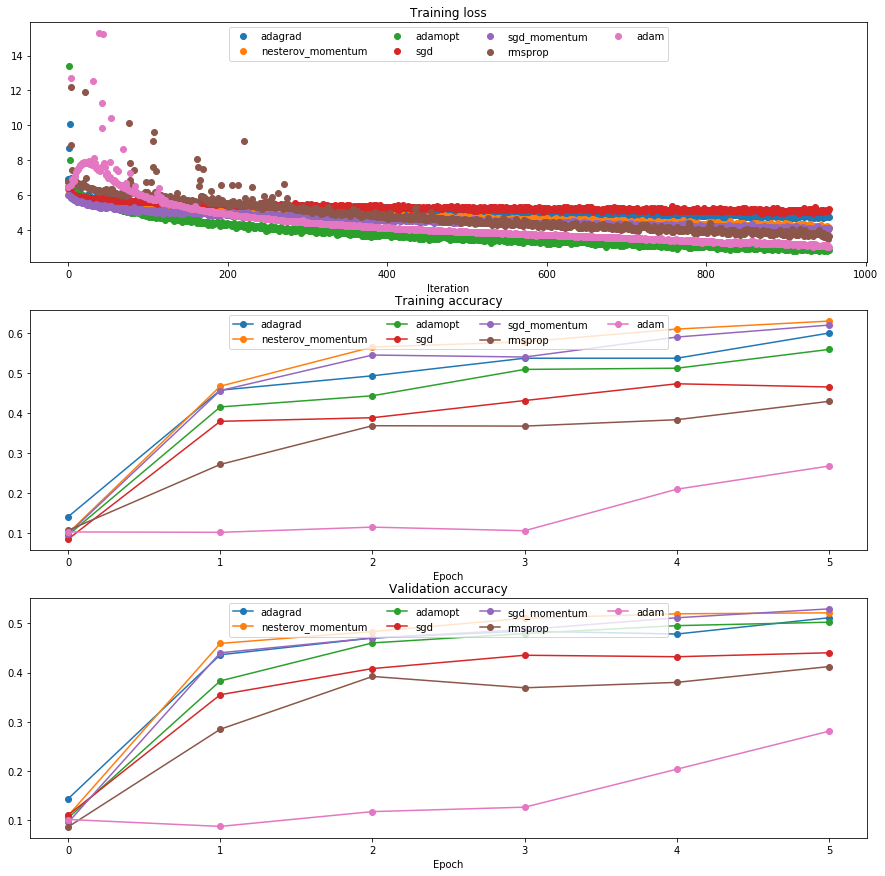

In [19]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [20]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.531
